In [1]:
import numpy as np
import pandas as pd


In [2]:
data =pd.read_csv("pima-indians-diabetes.csv", header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [5]:
X = data.iloc[:,:8]

y = data.iloc[:,8]

In [6]:
X

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


<AxesSubplot:>

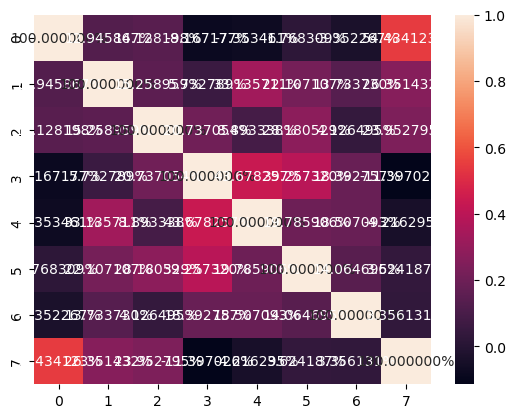

In [7]:
import seaborn as sns
sns.heatmap(X.corr() , annot = True, fmt = '%')


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 11 )

In [9]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)


array([[-0.47886515, -1.26194251, -0.40513927, ..., -0.4784309 ,
        -0.57032719, -0.67122221],
       [-0.80517149,  0.3678056 ,  0.10417867, ..., -0.70528866,
         0.00308926, -0.91871196],
       [-1.13147783, -0.39717821, -0.40513927, ..., -0.64227261,
        -1.06497765, -0.83621538],
       ...,
       [-1.13147783, -0.62999937,  1.02095096, ...,  1.92878198,
         1.54690279, -0.1762427 ],
       [ 0.50005387, -1.361723  , -1.0163208 , ...,  0.27776163,
         0.57650572, -0.67122221],
       [ 0.17374753,  0.50084626,  0.20604226, ..., -0.96995604,
        -0.61128551,  2.21615824]])

In [10]:
Y_train

274    0
74     0
179    1
339    1
741    0
      ..
269    1
337    1
91     0
80     0
703    0
Name: 8, Length: 614, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
log =  LogisticRegression()
log.fit(X_train, Y_train)
log.predict(X_test)
log.score(X_test,Y_test)

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7402597402597403

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 8)
forest.fit(X_train, Y_train)
forest.predict(X_test)
forest.score(X_test,Y_test)

0.7272727272727273

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, Y_train)
tree.predict(X_test)
tree.score(X_test,Y_test)

0.6753246753246753

In [14]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb.predict(X_test)
nb.score(X_test,Y_test)

0.7402597402597403

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
knn.predict(X_test)
knn.score(X_test,Y_test)

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

0.7142857142857143

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,knn.predict(X_test) ))
print(classification_report(Y_test,knn.predict(X_test)))

[[85 15]
 [29 25]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [17]:
confusion_matrix(Y_test,log.predict(X_test) )
print(classification_report(Y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       100
           1       0.69      0.46      0.56        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [18]:
print(classification_report(Y_test,tree.predict(X_test)))
confusion_matrix(Y_test,tree.predict(X_test) )

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.54      0.52      0.53        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



array([[76, 24],
       [26, 28]], dtype=int64)

In [19]:
print(classification_report(Y_test,forest.predict(X_test)))
confusion_matrix(Y_test,forest.predict(X_test) )

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       100
           1       0.66      0.46      0.54        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.72      0.73      0.71       154



array([[87, 13],
       [29, 25]], dtype=int64)

In [20]:
print(classification_report(Y_test,nb.predict(X_test)))
confusion_matrix(Y_test,nb.predict(X_test) )

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



array([[84, 16],
       [24, 30]], dtype=int64)

In [28]:
from sklearn import svm
sv = svm.SVC(kernel='linear') # Linear Kernel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)
sv.fit(x_train_standard, Y_train)
y_pred = sv.predict(x_test_standard)
sv.fit(x_train_standard, Y_train)
sv.score(x_test_standard, Y_test)


0.7402597402597403